# Sobre el dataset

### Descripción de las columnas:
**1. ID:** Un identificador para cada cliente.  
**2. Gender:** El género del cliente.  
**3. Own_car:** Una característica binaria que indica si el cliente posee un automóvil.  
**4. Own_property:** Una característica binaria que indica si el cliente posee una propiedad.  
**5. Work_phone:** Una característica binaria que indica si el cliente tiene un teléfono de trabajo.  
**6. Phone:** Una característica binaria que indica si el cliente tiene un teléfono.  
**7. Email:** Una característica binaria que indica si el cliente ha proporcionado una dirección de correo electrónico.  
**8. Unemployed:** Una característica binaria que indica si el cliente está desempleado. 
**9. Num_children:** El número de hijos que tiene el cliente.  
**10. Num_family:** El número total de miembros de la familia.  
**11. Account_length:** La duración de la cuenta del cliente con un banco o institución financiera.  
**12. Total_income:** El ingreso total del cliente.  
**13. Age:** La edad del cliente.  
**14. Years_employed:** El número de años que el cliente ha estado empleado.  
**15. Income_type:** El tipo de ingreso (por ejemplo, empleado, autónomo, etc.).  
**16. Education_type:** El nivel educativo del cliente.  
**17. Family_status:** El estado civil del cliente.  
**18. Housing_type:** El tipo de vivienda en la que vive el cliente.  
**19. Occupation_type:** El tipo de ocupación en la que está empleado el cliente.  
**20. Target:** La variable objetivo para la tarea de clasificación, que indica si el cliente es elegible para una tarjeta de crédito o no (por ejemplo, Sí/No, 1/0).  

# Indíce
**1- Importar librerias**  
**2- Cargar y examinar los datos**  
**3- Manejo de valores nulos y duplicados**  
**4- Manejo de valores outliers**  
**5- Ingeniería de características**    
**6- Guardar el dataset procesado**  

#### 1. Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

import os
from sys import path
import os
path.append(os.path.abspath(os.path.join('..')))
from util.util import *


In [2]:
os.chdir('..')

#### 2. Cargar y examinar los datos

In [3]:
df= pd.read_csv('data/raw/Dataset.csv', sep=',')

In [4]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [6]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


#### 3. Manejo de valores nulos y duplicados

In [7]:
# buscar valores nulos
df.isnull().sum()*100/len(df)

ID                 0.0
Gender             0.0
Own_car            0.0
Own_property       0.0
Work_phone         0.0
Phone              0.0
Email              0.0
Unemployed         0.0
Num_children       0.0
Num_family         0.0
Account_length     0.0
Total_income       0.0
Age                0.0
Years_employed     0.0
Income_type        0.0
Education_type     0.0
Family_status      0.0
Housing_type       0.0
Occupation_type    0.0
Target             0.0
dtype: float64

In [8]:
# buscar valores duplicados
df.duplicated().sum()

0

Como podemos ver no existen nulos ni duplicados en el dataset. asi que no es necesario hacer algún tratamiento

#### 4. Manejo de valores outliers

In [9]:
df_outliers= get_outliers(df, implace=False)

Outliers in ID: 0 or 0.00%
Outliers in Gender: 0 or 0.00%
Outliers in Own_car: 0 or 0.00%
Outliers in Own_property: 0 or 0.00%
Outliers in Work_phone: 2111 or 21.74%
Outliers in Phone: 0 or 0.00%
Outliers in Email: 850 or 8.75%
Outliers in Unemployed: 1696 or 17.47%
Outliers in Num_children: 152 or 1.57%
Outliers in Num_family: 142 or 1.46%
Outliers in Account_length: 0 or 0.00%
Outliers in Total_income: 318 or 3.28%
Outliers in Age: 0 or 0.00%
Outliers in Years_employed: 469 or 4.83%
Outliers in Target: 1283 or 13.21%
(9709, 20)


las variables con mas del 15% de outliers son variables binarias, asi que vamosa a remplazarlos por la media

In [ ]:

# Reemplazar outliers en 'Work_phone' con la mediana
median_work_phone = df_outliers['Work_phone'].median()
df.loc[df['Work_phone'].isin(df_outliers['Work_phone']), 'Work_phone'] = median_work_phone

# Reemplazar outliers en 'Unemployed' con la mediana
median_unemployed = df_outliers['Unemployed'].median()
df.loc[df['Unemployed'].isin(outliers), 'Unemployed'] = median_unemployed

Mostramos histogramos de las variables numericas:

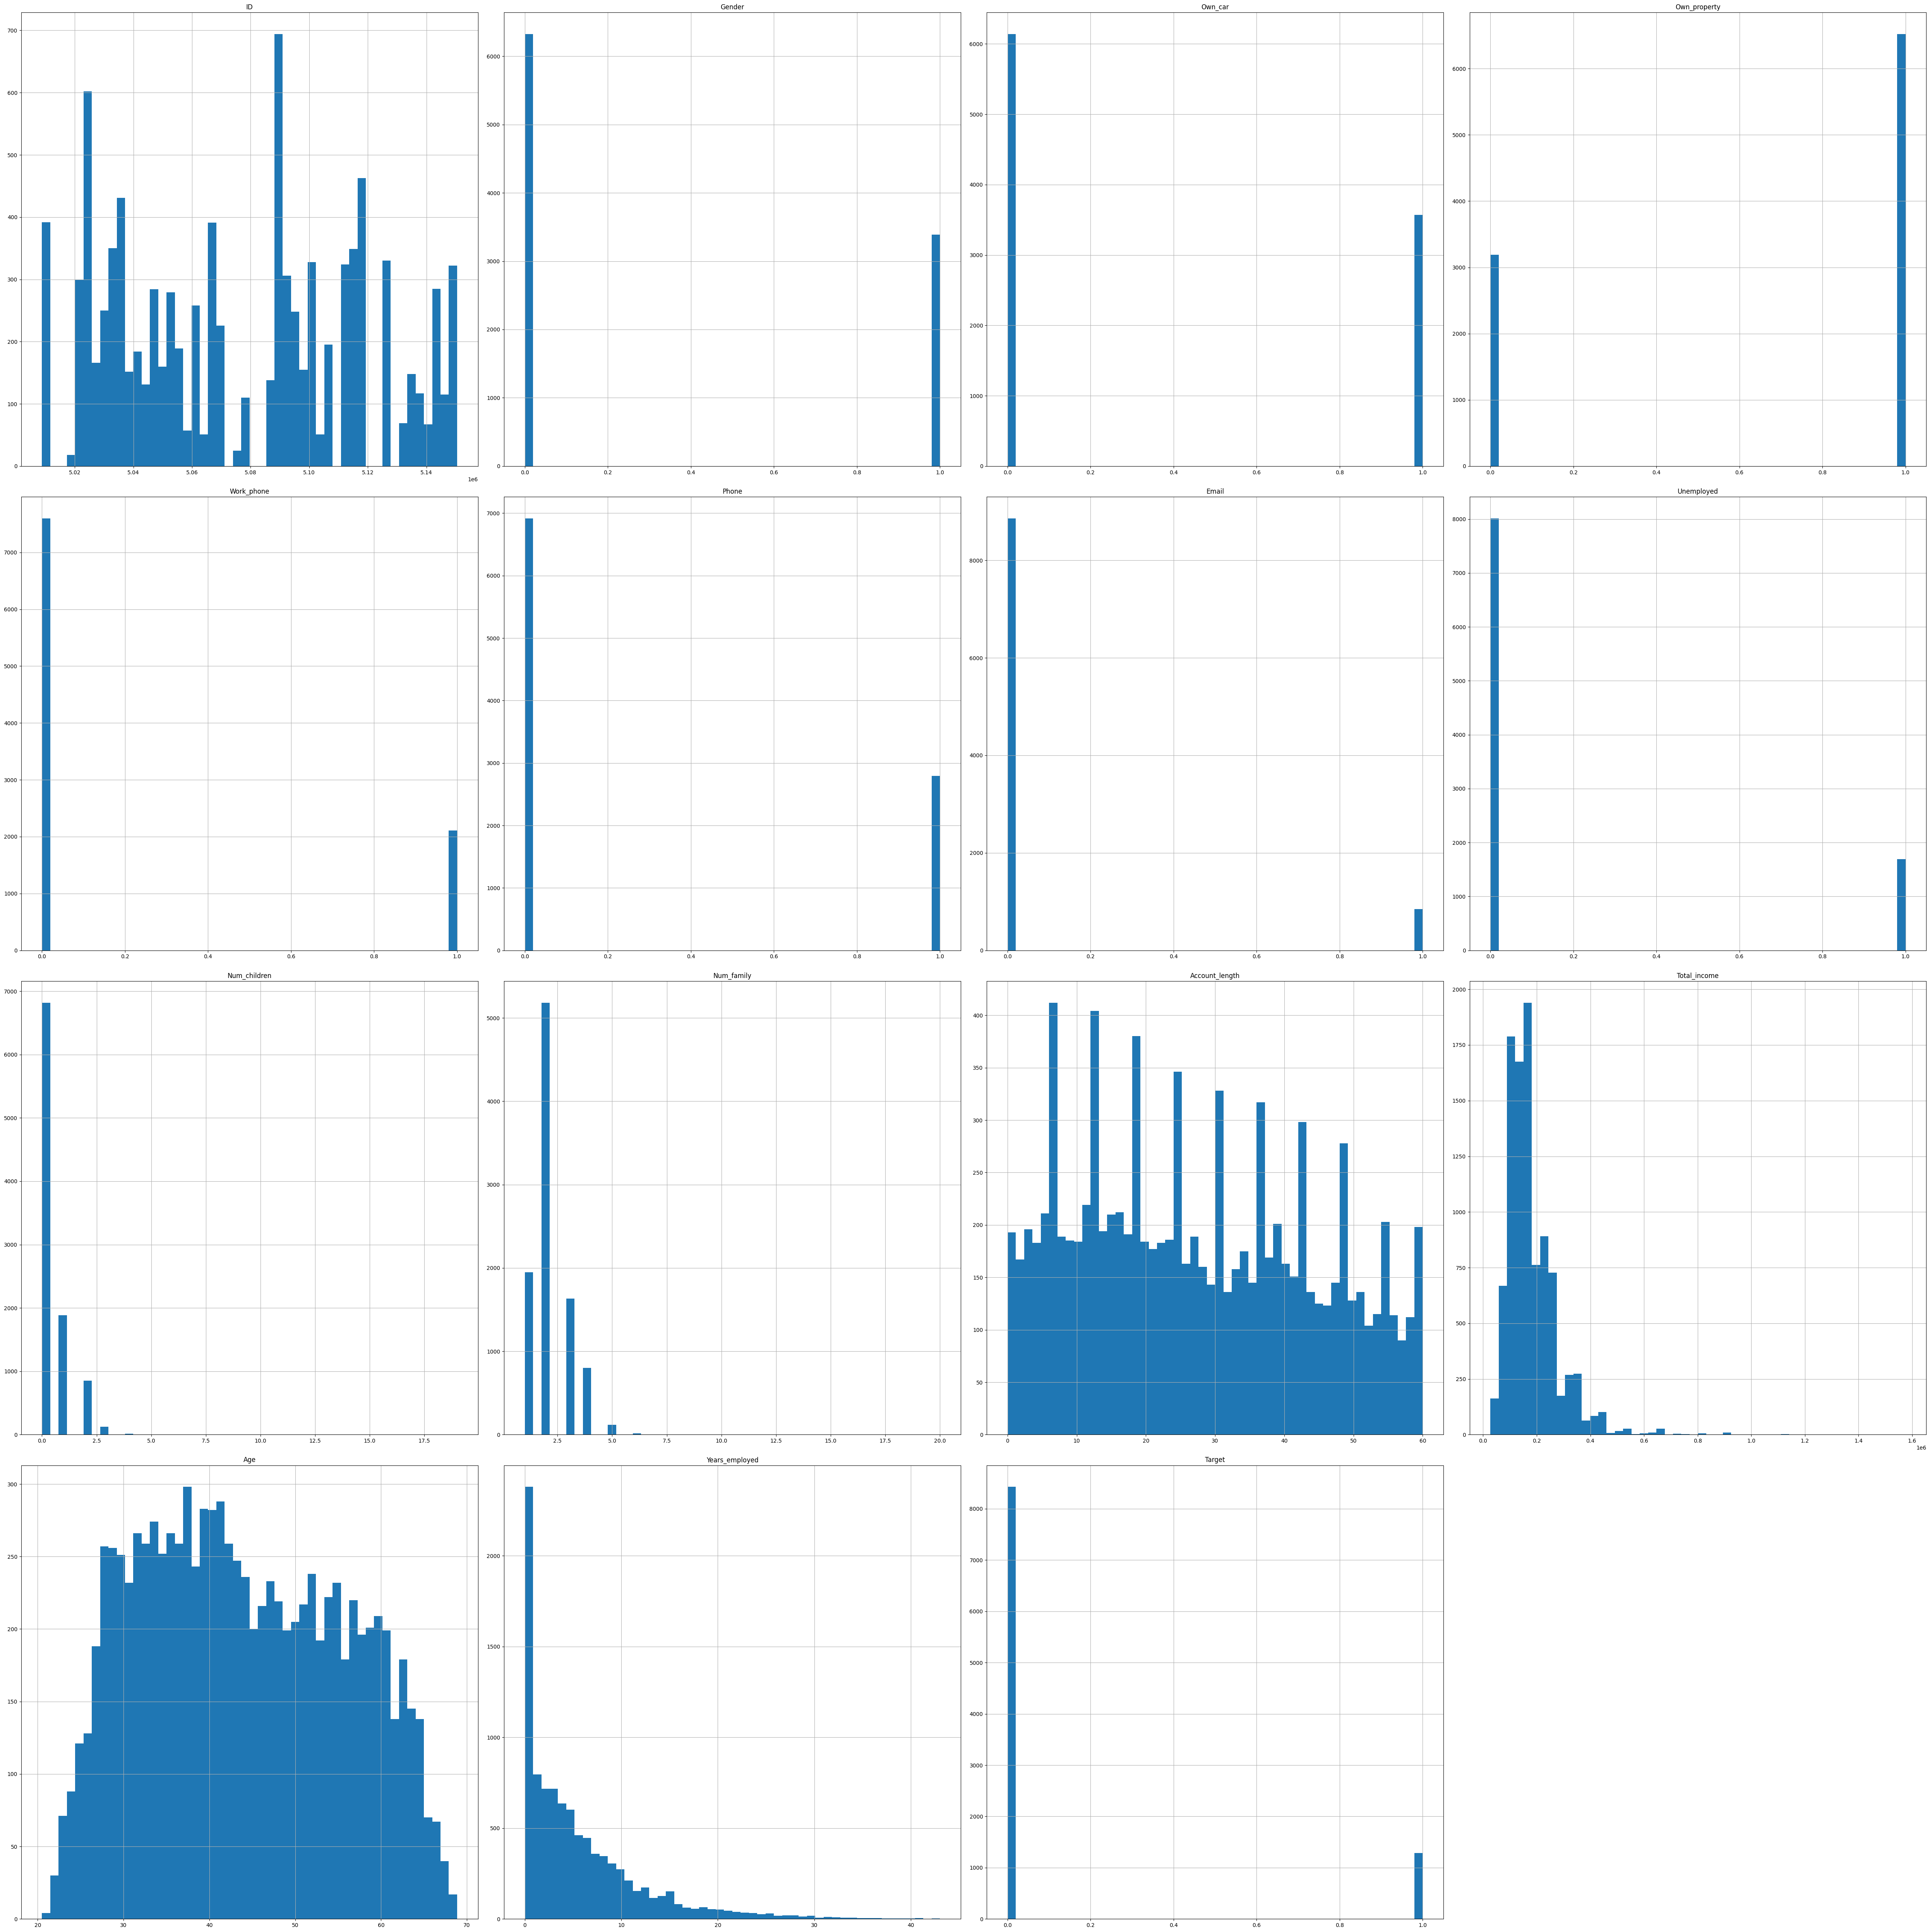

In [9]:
fig = df.hist(figsize=(10, 10), bins=50)
#ajustamos el layout
plt.tight_layout(rect=(0, 0, 5, 5))
plt.show()

#### 5. Ingenieria de caracteristicas

#### 5.1 Dividir las variables numericas y categoricas

In [11]:
# columnas numericas
num_cols = df.select_dtypes(include=('int64', 'float64'))

# columnas booleanas
bool_cols = df[num_cols.columns[(
    df[num_cols.columns].isin([0,1])).all()]]

# removemos las columnas booleanas de las numericas
num_cols.drop(bool_cols.columns.to_list(), axis=1, inplace=True)

# columnas categoricas
str_cols = df.select_dtypes(include='object')
cat_cols= df[str_cols.columns.tolist()+ bool_cols.columns.tolist()]
print(f'Columnas Totales: {len(df.columns)}')
print(f'Columnas Booleanas: {len(bool_cols.columns)}')
print(f'Columnas Object: {len(str_cols.columns)}')
print(f'Columnas categoricas: {len(cat_cols.columns)}')
print(f'Columnas numericas: {len(num_cols.columns)}')

Columnas Totales: 20
Columnas Booleanas: 8
Columnas Object: 5
Columnas categoricas: 13
Columnas numericas: 7


#### 5.2 AB testing para variables categoricas

Empezaremos a evualuar la importancia de las variables categoricas con respecto a la 'Target' mediante el test de hipotesis Chi-cuadrado.
en el cual plantearemos:
- Hipotesis nula (H0): no hay relación entre la variable categorica y la 'Target'  
- Hipotesis alternativa (H1): Hay relación entre la variable categorica y la 'Target'  

Si el p-valor es menor a 0.05 rechazamos la hipotesis nula  
y la consideramos Signficativa

In [16]:
# Lista para almacenar los resultados
result= []

for column in cat_cols:
    # Calculamos la tabla de contingencia
    tb_contigencia= pd.crosstab(cat_cols[column], df['Target'])
    #Test de Chi Cuadrado:
    chi2 , p_value = chi2_contingency(tb_contigencia)[:2]
    # Guardamos el resultado
    result.append({'chi_cuadrado':chi2,
                   'P_valor': p_value})

df_chi2= pd.DataFrame(result, index=cat_cols.columns)
df_chi2["Significativa"] = np.where(
    df_chi2["P_valor"] <= 0.05, "Si", "No")
df_chi2.head(20)

,chi_cuadrado,P_valor,Significativa
Income_type,3.519132,0.474975,No
Education_type,7.688654,0.103672,No
Family_status,8.263560,0.082387,No
Housing_type,5.407396,0.368207,No
Occupation_type,13.867657,0.737677,No
Gender,2.101923,0.147114,No
Own_car,0.406571,0.523715,No
Own_property,7.559452,0.005970,Si
Work_phone,0.063153,0.801581,No
Phone,0.808517,0.368559,No


# **Faltaria arreglar las variables**

In [12]:
for column in str_cols.columns:
    print(df[column].value_counts())

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64
Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64
Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   62

#### 5.3 AB testing para variables numericas

Para evaluar estadisticamente la importancia de las variables numericas con respecto a la 'Target' utilizaremos el test de hipotesis de Mann-Whitney U  
En el cual plantearemos:
- Hipotesis nula (H0): no hay diferencia entre las medias de la variable numerica con respecto a la 'Target'
- Hipotesis alternativa (H1): Hay diferencia entre las medias de la variable numerica con respecto a la 'Target'

Si el p-valor es menor a 0.05 rechazamos la hipotesis nula
y la consideramos Signficativa

In [13]:
# Lista para almacenar los resultados
result= []

for column in num_cols:
    # Dividimos en dos grupos
    grupo1 = num_cols.loc[df['Target']==1, column]
    grupo2 = num_cols.loc[df['Target']==0, column]
    #Test de Mann-Whitney U :
    u_stat, p_value = mannwhitneyu(grupo1, grupo2)
    # Guardamos el resultado
    result.append({'u_stat':u_stat,
                   'P_valor': p_value})

df_mann= pd.DataFrame(result, index=num_cols.columns)
df_mann["Significativa"] = np.where(
    df_mann["P_valor"] <= 0.05, "Si", "No")

In [14]:
df_mann

,u_stat,P_valor,Significativa
ID,5417796.0,8.935403e-01,No
Num_children,5521963.0,1.204811e-01,No
Num_family,5471225.5,4.401938e-01,No
Account_length,6140427.0,3.799318e-15,Si
Total_income,5473329.0,4.658587e-01,No
Age,4999343.5,1.423291e-05,Si
Years_employed,5436917.0,7.344803e-01,No


In [17]:
print(df_mann[df_mann['Significativa']=='Si'].T.columns.to_list())
print(df_chi2[df_chi2['Significativa']=='Si'].T.columns.to_list())  

['Account_length', 'Age']
['Own_property', 'Unemployed', 'Target']


In [18]:
df_mann[df_mann['Significativa']=='Si'].T.columns.to_list() +df_chi2[df_chi2['Significativa']=='Si'].T.columns.to_list()

['Account_length', 'Age', 'Own_property', 'Unemployed', 'Target']

In [19]:
df_ML= df[df_mann[df_mann['Significativa']=='Si'].T.columns.to_list() +df_chi2[df_chi2['Significativa']=='Si'].T.columns.to_list()]

In [20]:
df_ML.head()

,Account_length,Age,Own_property,Unemployed,Target
0,15,32.868574,1,0,1
1,29,58.793815,1,0,0
2,4,52.321403,1,0,0
3,20,61.504343,1,1,0
4,5,46.193967,1,0,0


#### 6. Guardamos el dataset

In [21]:
df_ML.to_csv('data/processed/dataset_ML.csv', index=False)